# Askö dataset - analysis

Motivation (from Anders)

> I'm a bit surprised by how shallowly the CRISPRs seem to be sampled. To get a feeling for
the coverage of the data I calculated something very similar to h-index
(https://en.wikipedia.org/wiki/H-index). For example, if a CRISPR has h_index = 9 it means that
9 of the spacer types are found in at least 9 of the samples. Below I've plotted the distribution
of h-indices. As you can see most CRISPRs have h_index = 1, meaning that not even 2 spacer
types are found in 2 or more samples. The samples analysed here have all been pre-filtred
through a 3 um filter before the cells were captured. This means that particle associated
bacteria have been removed. Based on isolate genomes it is believed that free-living,
oligotrophic bacteria rarely have CRISPRs, while copiotrophic bacteria such as those attached
to particles tend to have. Therefor it would be interesting to see what we get when looking at
bacteria from another filter fraction. We could either use data from the cross-baltic transect
that we have mentioned before (30 samples: 3 depths from 10 geographic locations). These are 
not pre-filtered so we should have both free-living and particle associated cells captured.
Or we could use published data from another group. https://www.ncbi.nlm.nih.gov/bioproject/
PRJNA322246/  This is 6 time points, june - august 2011, from a single station in the Baltic.
Data is available from 4 size fractions: 3.0–200, 0.8–3.0, 0.1–0.8 μm, and a viral
fraction. Maybe we could run crispr finding on only the 6 samples from the largest size
fraction (3.0–200 um) and see what we get?

tldr:

I used the six 3-200 um fractionated samples from here, and computed some CRISPR profile stats:

[https://trace.ncbi.nlm.nih.gov/Traces/study/?acc=SRP077551](https://trace.ncbi.nlm.nih.gov/Traces/study/?acc=SRP077551)


In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

# laptop config:
# source code location
src = "/home/sergiu/data/work/andersson/src/andersson/src"
# crispr file generated by crass (xml format)
crispr_location = "/home/sergiu/data/work/andersson/data/asko/crass/crass.crispr"
# tab separated output
#crispr_tab_location = "/home/sergiu/data/work/andersson/data/asko/spacer_table_filtered.txt"
crispr_tab_location = "/home/sergiu/data/work/andersson/data/asko/spacer_table_filtered_all.txt"

#desktop config:
# source code location
#src = "/home/sergiu/data/data/work/andersson/src/andersson/src"
# crispr file generated by crass (xml format)
#crispr_location = "/home/sergiu/data/data/work/andersson/data/asko/crass/crass.crispr"
# tab separated output
#crispr_tab_location = "/home/sergiu/data/data/work/andersson/data/asko/spacer_table_filtered.txt"


sample_list = ['SRR3727523_R1', 'SRR3727518_R1', 'SRR3727515_R1', 
               'SRR3727513_R1', 'SRR3727509_R1', 'SRR3727505_R1', 
               'SRR3727523_R2', 'SRR3727518_R2', 'SRR3727515_R2', 
               'SRR3727513_R2', 'SRR3727509_R2', 'SRR3727505_R2']

# copy-pasted from SRA
meta = {'SRR3727523': '29-Jun-2011', 'SRR3727518': '30-Aug-2011', 
        'SRR3727515': '14-Jun-2011', 'SRR3727513': '17-Aug-2011',
        'SRR3727509': '03-Aug-2011', 'SRR3727505': '20-Jul-2011'}

timeorder = ['SRR3727515', 'SRR3727523', 'SRR3727505', 'SRR3727509', 'SRR3727513', 'SRR3727518']

if not src in sys.path:
    sys.path.append(src)
else:
    print(sys.path)

import crass_crispr_parser as crispr

# TODO:

- print spacer graphs:
    - logs/spacer_graphs.ipynb


/home/sergiu/data/data/work/andersson/doc/mail_spacerstats_poisson_sampling.pdf

## Generate the CRISPR table

This step was sourced.

In [2]:
doc = crispr.import_crass_crispr(crispr_location)
groups, spacers, sources, spcont = crispr.extract_info_all(doc)

# filter single spacers
spacers = crispr.filter_single_spacers(spacers, spcont)
# filter spacers sharing their first(last) n nuccleotides with each other (inside a cluster)
spacers = crispr.filter_similar_spacers(spacers, nnuc=9)
# filter spacers sharing their first(last) n nuccleotides with their DR
spacers = crispr.fiter_DR_shared_spacers(spacers, groups, nnuc=9)

crispr.write_table(crispr_tab_location, sample_list, groups, spacers, sources)


Done!

Spacer count before single spacer removal: 5245
Spacer count after single spacer removal: 2385

Spacer count before similar spacer removal: 2385
Spacer count after similar spacer removal: 2187

Spacer count before DR-shared spacer removal: 2187
Spacer count after DR-shared spacer removal: 1946
Wrote data to: /home/sergiu/data/work/andersson/data/asko/spacer_table_filtered_all.txt


In [3]:
df = pd.read_csv(crispr_tab_location, sep="\t")
df.head()

,CRISPRid,DRseq,SPid,SPseq,SRR3727523_R1,SRR3727518_R1,SRR3727515_R1,SRR3727513_R1,SRR3727509_R1,SRR3727505_R1,SRR3727523_R2,SRR3727518_R2,SRR3727515_R2,SRR3727513_R2,SRR3727509_R2,SRR3727505_R2
0,G171,GAGTCTAGACGATTGGGATATGCGCTCTGGCCGGAAC,SP54,ATGTAGGCTCACCATTGGCATTGAAGGTC,20,0,0,0,0,0,19,0,0,0,0,0
1,G171,GAGTCTAGACGATTGGGATATGCGCTCTGGCCGGAAC,SP6,TCGCGGATTGCCGCCGTGCTGGCGTTGAT,20,0,0,0,0,0,0,0,0,0,0,0
2,G313,AGTGTCTTTATAGCACCACATTGGAATTGAAAC,SP42,GTTCTTGAACTTAACTTTGAAGTTAAATCTT,1,0,0,0,0,0,25,0,0,0,0,0
3,G313,AGTGTCTTTATAGCACCACATTGGAATTGAAAC,SP6,ATACTATCATAAGCTGCATCTATATTCTCGTT,24,0,0,0,0,0,1,0,0,0,0,0
4,G343,ATTCGCCACGATATTTACCCCGCAAGGGGACGGAAAC,SP3198,ATAGTTGTGACACTAGAGTTTCTCCTTCTAAAAATAATGTAAC,0,0,0,0,0,5,0,0,0,0,0,6


In [4]:
df.describe(include='all')

,CRISPRid,DRseq,SPid,SPseq,SRR3727523_R1,SRR3727518_R1,SRR3727515_R1,SRR3727513_R1,SRR3727509_R1,SRR3727505_R1,SRR3727523_R2,SRR3727518_R2,SRR3727515_R2,SRR3727513_R2,SRR3727509_R2,SRR3727505_R2
count,1946,1946,1946,1946,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
unique,496,496,935,1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,G1488,GCTTCAAAGCCTCTGAAACCCTTTTAGGGATTGAAAC,SP5,ATAGATATTGGACTAAACGCTTAGCTAATATTGTTGAGAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,243,243,99,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.078623,0.720966,1.464543,2.201439,2.631038,3.447071,3.966598,0.774409,1.489723,2.223535,2.781089,3.475848
std,NaN,NaN,NaN,NaN,12.865189,2.868989,13.872353,5.092110,8.664174,7.143662,11.318725,2.976339,14.184105,5.443506,9.206255,6.930925
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.000000,3.000000,2.000000,4.000000


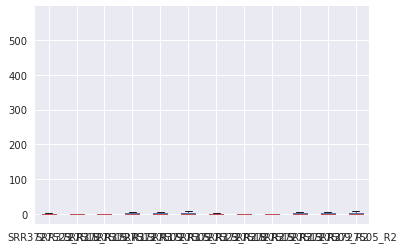

In [5]:
df.boxplot()

How the spacer repertoire looks for a CRISPR, line "vision":

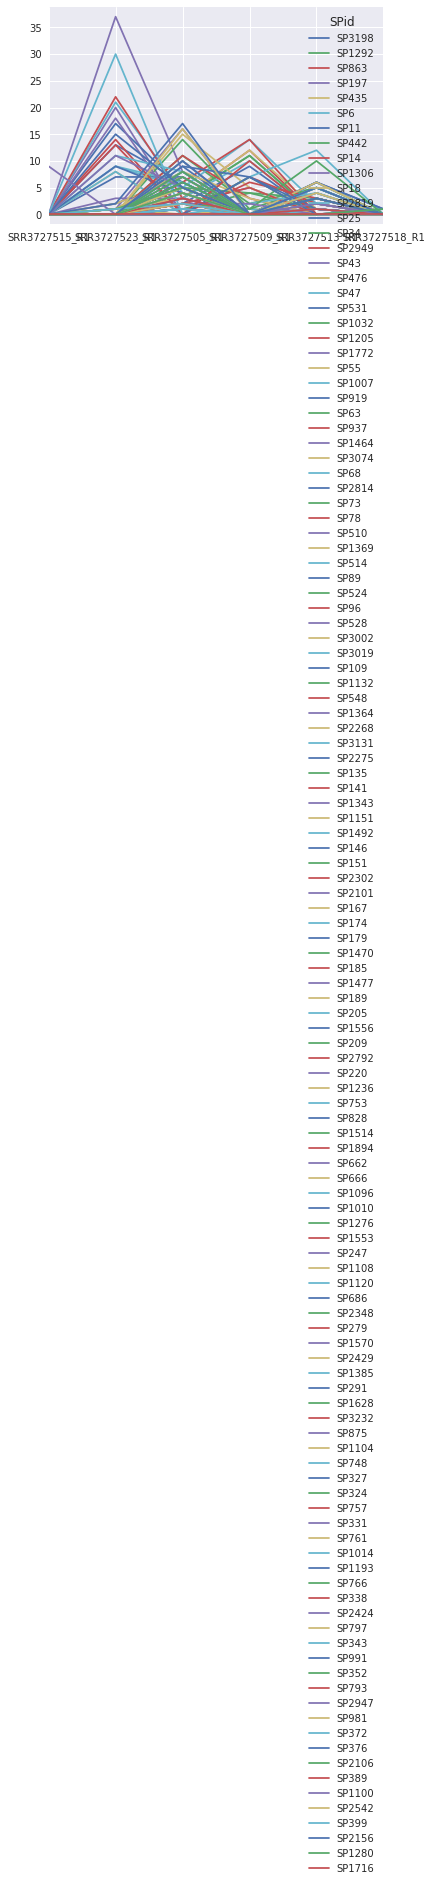

In [6]:
#G343
def group_df(id):
    gdf = df[df["CRISPRid"]==id]
    gdf = gdf.drop([df.columns[i] for i in [0,1,3]], axis = 1)
    gdf = gdf.set_index('SPid')
    gdf = gdf.iloc[:,0:6].copy()  #plot R1 samples only
    gdf = gdf[[t+"_R1" for t in timeorder]]
    gdf = gdf.transpose()
    return gdf

gdf = group_df("G343")
gdf.plot(legend=True)

How the spacer repertoire looks for a CRISPR, table "vision":

In [7]:
gdf = group_df("G343")
gdf.head()

SPid,SP3198,SP1292,SP863,SP197,SP435,SP6,SP11,SP442,SP14,SP1306,...,SP372,SP376,SP2106,SP389,SP1100,SP2542,SP399,SP2156,SP1280,SP1716
SRR3727515_R1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
SRR3727523_R1,0,0,0,20,0,21,2,0,22,1,...,0,15,0,0,0,0,1,0,0,0
SRR3727505_R1,5,3,0,0,5,4,7,1,3,2,...,0,5,6,3,4,4,2,10,4,0
SRR3727509_R1,0,11,0,0,0,0,0,4,12,5,...,0,0,0,0,0,0,0,0,0,0
SRR3727513_R1,0,0,0,2,1,0,3,3,0,0,...,1,0,3,1,2,0,0,3,0,0


# H-index (Hirsch index)

This index was adapted by Anders from the research publishing industry. A CRISPR (author) has index h if h of N spacers (papers) have at least h sample occurences (citations) each, and the other N − h spacers (papers) have no more than h sample occurences (citations) each.

Trying now to figure out a Hirsch index function:

In [8]:
# occurences per spacer
#occurences = [3, 0, 6, 1, 5]
occurences = [ 1, 1, 1, 1, 9, 10, 5, 4, 4, 1, 1]

print(sorted(occurences, reverse=True))
print("min occurence/no of spacers:")
print([(x,i + 1, x >= i + 1) for i, x in enumerate(sorted(occurences, reverse=True))])

sum(x >= i + 1 for i, x in enumerate(sorted(occurences, reverse=True)))

[10, 9, 5, 4, 4, 1, 1, 1, 1, 1, 1]
min occurence/no of spacers:
[(10, 1, True), (9, 2, True), (5, 3, True), (4, 4, True), (4, 5, False), (1, 6, False), (1, 7, False), (1, 8, False), (1, 9, False), (1, 10, False), (1, 11, False)]


4

Now, computing the h-indexes for all our CRISPRs. Note that I only used the R1 samples ...

In [9]:
crisprs = set(df["CRISPRid"].values)
hindexes = {}
for crispr in crisprs:
    #h = N
    gdf = group_df(crispr)
    spacers = set(gdf.columns.values)
    occ = [gdf[gdf[spacer]>0].shape[0] for spacer in spacers]
    h = sum(x >= i + 1 for i, x in enumerate(sorted(occ, reverse=True)))
    hindexes[crispr]=h

Histogram plot:

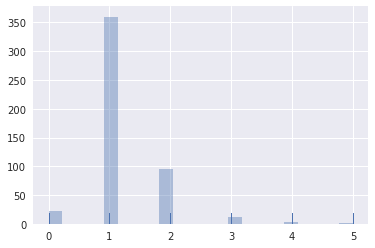

In [10]:
x = list(hindexes.values())
sns.distplot(x, kde=False, rug=True);

In [11]:
[crispr for crispr in hindexes if hindexes[crispr]>4]

['G270087', 'G493']

# Spacer profiles

This is ordered by sample collection time. Two examples, the only crisprs that had 5 h-index.

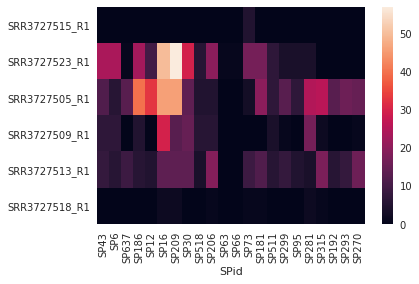

In [12]:
gdf = group_df('G270087')

sns.heatmap(gdf)

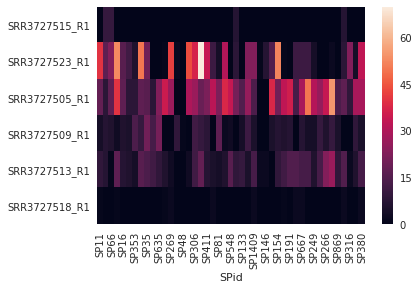

In [13]:
gdf = group_df('G493')

sns.heatmap(gdf)